# Teste de treinamento com a base de dados
### Importar bibliotecas

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt

### Importa a base de treinamento e as indicações de material do algoritmo nos arquivos csv

In [10]:
#Carrega as bases dos arquivos csv
base_treino = pd.read_csv('base_treino.csv', sep=';')
base_indicada_algoritmo = pd.read_csv('base_material_inidicado_algoritmo.csv', header=None, sep=';')

#Pega apenas o material indicado pelo algoritmo
materiais_indicado_algoritmo = base_indicada_algoritmo.iloc[:,-1]

#Remove o material indicado pelo algoritmo para testar com o knn
questionarios_indicar_material_knn = base_indicada_algoritmo.iloc[:,:-1]

print("Tamanho do dataframe de treino:",base_treino.shape)
print("Tamanho do dataframe indicado pelo algoritmo:",base_indicada_algoritmo.shape)
print("Tamanho do dataframe para o knn indicar:",questionarios_indicar_material_knn.shape)
questionarios_indicar_material_knn.head()

Tamanho do dataframe de treino: (400, 13)
Tamanho do dataframe indicado pelo algoritmo: (40, 13)
Tamanho do dataframe para o knn indicar: (40, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,1,0,0,1,1,1,1,0
3,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,1,0,1,0,1,1,0,1


### Teste K-Fold

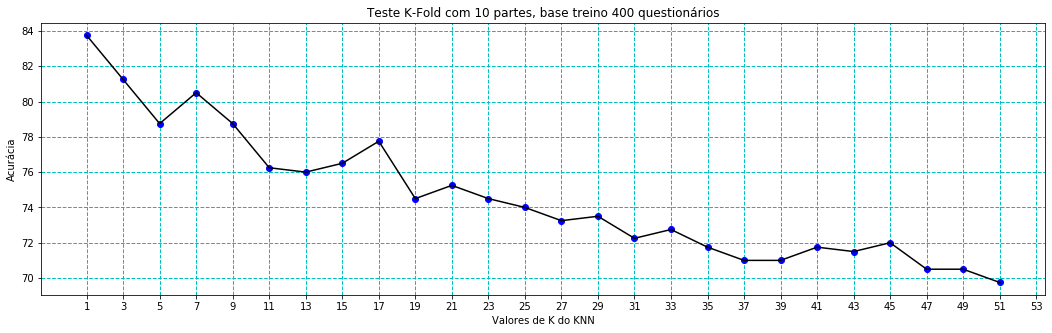

In [11]:
#axis=1 indica coluna, o padrão é axis=0 que é linha
x = base_treino.drop('Material', axis=1) #Remove a coluna Material para pegar apenas as respostas
y = base_treino.Material #Pega apenas a coluna Material
CONST_K = 51 #Valor máximo que o K vai variar (de 1 até CONST_K de 2 em 2, já que o k tem que ser ímpar)


#Cria o classificador e passa o k
knn = KNeighborsClassifier(n_neighbors = 1)
knn.n_neighbors = 1
x_ks_utilizado = []
y_acurracias = []

while True:
    #Validação Cruzada K-Fold com 10 partes  
    acur = cross_val_score(knn, x, y, cv = 10, scoring='accuracy').mean()
    y_acurracias.append(acur * 100)
    x_ks_utilizado.append(knn.n_neighbors)
    
    if knn.n_neighbors < CONST_K:
        knn.n_neighbors += 2
    else:
        break

#plt.axis([0, 20, 50, 100])
plt.figure( figsize=(18, 5)) #Tamanho figura
plt.title(f"Teste K-Fold com 10 partes, base treino {len(x)} questionários")
plt.grid(color='c', linestyle='--', linewidth=1)
plt.xlabel("Valores de K do KNN")
plt.xticks(range(1, 102, 2))
plt.ylabel("Acurácia")
#plt.yticks(range(50, 100, 10))
plt.plot(x_ks_utilizado, y_acurracias, 'bo')
plt.plot(x_ks_utilizado, y_acurracias, 'k-', color='black')
plt.show()

### Teste variando o tamanho da base e o K do KNN

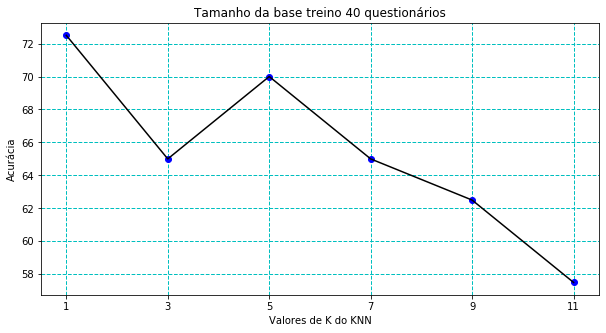

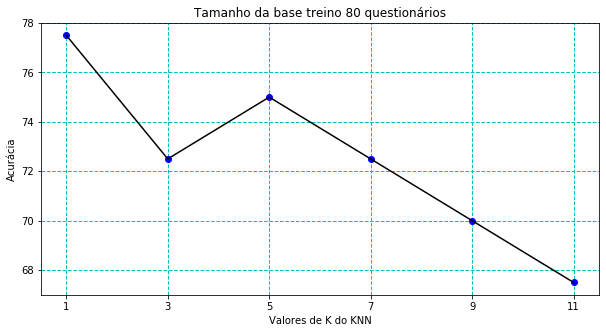

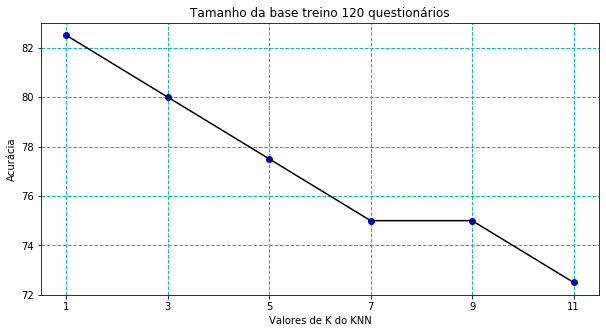

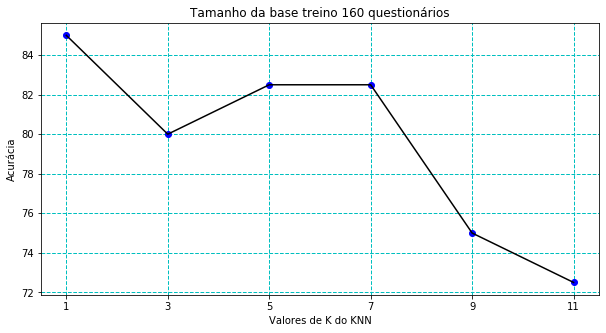

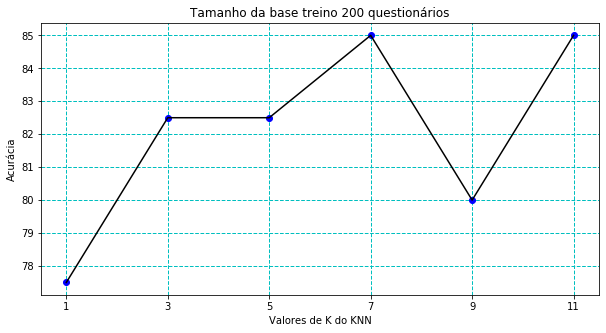

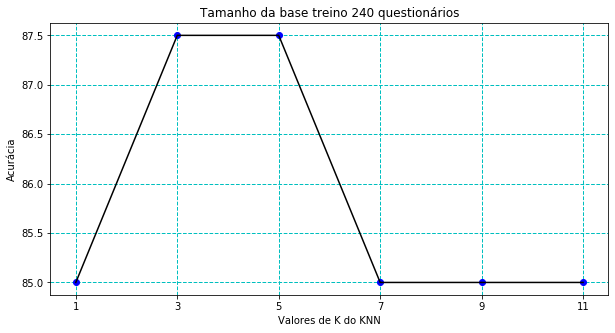

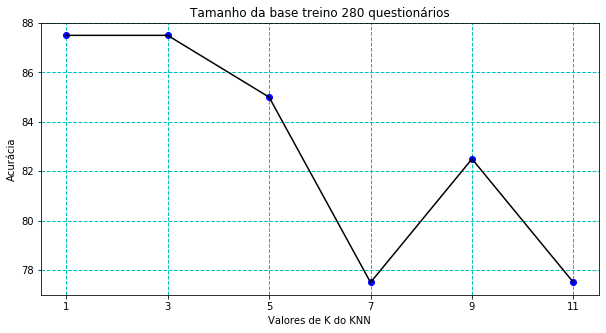

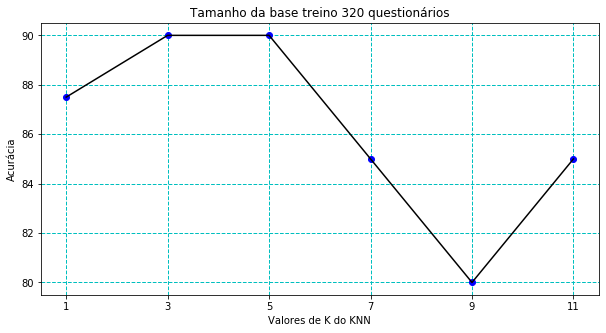

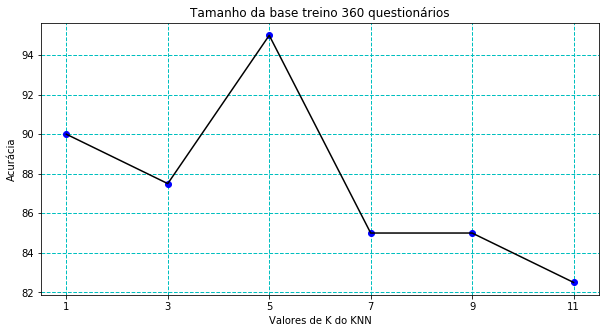

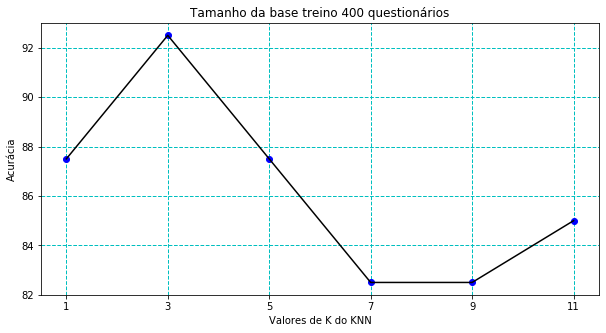

In [12]:
tamanho_base = 0
CONST_K = 11 #Valor máximo que o K vai variar (de 1 até CONST_K de 2 em 2, já que o k tem que ser ímpar)

#Loop para ir incrementando de 40 em 40 linhas a base de treino
while True:
    #Incrementa o tamanho da base de treinamento
    tamanho_base += 40

    #Se for maior que o tamanho total da base de teino
    if tamanho_base > base_treino.shape[0]:
        break

    knn.fit(x.head(tamanho_base), y[0 : tamanho_base])
    
    x_lista_ks = []
    y_lista_acuracia = []

    #Loop para variar o k de 1 até CONST_K de 2 em 2
    for k in range(1, CONST_K+1, 2):
        knn.n_neighbors = k #Atualiza o k
        qtdAcertos = 0
        indice = 0
        
        qtdAcertos = 0
        
        #Loop nos questionários que o KNN vai indicar o material
        for questionario in questionarios_indicar_material_knn.to_numpy():
            materials_indicado_knn = knn.predict([questionario])

            if materials_indicado_knn == materiais_indicado_algoritmo[indice]:
                qtdAcertos += 1
                
            indice += 1
        
        acuracia = (qtdAcertos / materiais_indicado_algoritmo.size) * 100
        x_lista_ks.append(k)
        y_lista_acuracia.append(acuracia)
        
    plt.figure( figsize=(10, 5)) #Tamanho figura
    plt.title(f"Tamanho da base treino {tamanho_base} questionários")
    plt.grid(color='c', linestyle='--', linewidth=1)
    plt.xlabel("Valores de K do KNN")
    plt.xticks(range(1, 50, 2))
    plt.ylabel("Acurácia")
    plt.plot(x_lista_ks, y_lista_acuracia, 'bo')
    plt.plot(x_lista_ks, y_lista_acuracia, 'k-', color='black')
    #plt.savefig(f"Graficos\\base{tamanho_base}.png", format='png') #Salvar imagens dos gráficos
    plt.show()